In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import copy
import matplotlib.pyplot as plt
from greeks_hedge_ratio import *
from strategy_builder import *

In [2]:
def single_option_upside_long_dugu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] <= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] <= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "call", "size": 10}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_upside_short_dugu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] >= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] >= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "call", "size": -10}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_downside_long_dugu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] >= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] <= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "put", "size": 10}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_downside_short_dugu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] <= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] >= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "put", "size": -10}]
            
        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df


In [3]:
def single_option_upside_long_gu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] <= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] <= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "call", "size": 10},

                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": -delta_hedge_ratio*10}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": delta_hedge_ratio*10}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_upside_short_gu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] >= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] >= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "call", "size": -10},

                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": delta_hedge_ratio*10}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": -delta_hedge_ratio*10}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_downside_long_gu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] >= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] <= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "put", "size": 10},
                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": delta_hedge_ratio*10}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": -delta_hedge_ratio*10}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_downside_short_gu(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] <= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] >= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "put", "size": -10},

                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": -delta_hedge_ratio*10}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": delta_hedge_ratio*10}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df


In [4]:
def single_option_upside_long(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] <= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] <= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "call", "size": 10},

                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": -delta_hedge_ratio*10-gamma_hedge_ratio*5}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": delta_hedge_ratio*10-gamma_hedge_ratio*5}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_upside_short(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["call_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] >= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] >= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "call", "size": -10},

                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": delta_hedge_ratio*10+gamma_hedge_ratio*5}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": -delta_hedge_ratio*10+gamma_hedge_ratio*5}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_downside_long(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] >= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] <= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "put", "size": 10},
                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": delta_hedge_ratio*10-gamma_hedge_ratio*5}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": -delta_hedge_ratio*10-gamma_hedge_ratio*5}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df

def single_option_downside_short(df, expiry, factor, sd, lookback, skew_percentile, kurt_percentile): # factor in string format / long slope denotes long the calls and short the puts

    df["skew_percentile"] = df[f"skew_{factor}_{expiry}"].rolling(window=lookback).quantile(skew_percentile/100)
    df["kurt_percentile"] = df[f"kurt_{factor}_{expiry}"].rolling(window=lookback).quantile(kurt_percentile/100)
    df = df.iloc[lookback - 1:].reset_index(drop=True)

    for i in range(len(df)-1):

        base_val = df.loc[i, f"base_val_{expiry}"]
        dte = df.loc[i, f"DTE_{expiry}"]
        atm_vol = df.loc[i, f"atm_vol_{expiry}"]/100

        delta_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_delta_ratio"]
        gamma_hedge_ratio = get_greeks_ratio(base_val,atm_vol,sd)["put_gamma_ratio"]

        if df.loc[i, "expiry_date_1"] == df.loc[i+1, "expiry_date_1"] and df.loc[i, f"skew_{factor}_{expiry}"] <= df.loc[i, "skew_percentile"] and df.loc[i, f"kurt_{factor}_{expiry}"] >= df.loc[i, "kurt_percentile"] and df.loc[i+1, "base_change_1"] > -0.45:
                                                
            df.at[i,"positions"] = [{"strike":base_val*(1+sd*atm_vol*((dte/365)**0.5)), "expiry": expiry, "option_type": "put", "size": -10},

                                    {"strike":base_val, "expiry": expiry, "option_type": "call", "size": -delta_hedge_ratio*10+gamma_hedge_ratio*5}, # this is the delta hedging component
                                    {"strike":base_val, "expiry": expiry, "option_type": "put", "size": delta_hedge_ratio*10+gamma_hedge_ratio*5}]

        else:
            df.at[i,"positions"] = [{"strike":base_val, "expiry": expiry, "option_type": "call", "size": 0}]

    return df


c:\Users\ryant\OneDrive\Desktop\Options Pricing Analysis\Backtest Engine\strategy_builder.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.451084057369957' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, "PnL"] = pnl
c:\Users\ryant\OneDrive\Desktop\Options Pricing Analysis\Backtest Engine\strategy_builder.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.83763401446682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, "PnL"] = pnl
c:\Users\ryant\OneDrive\Desktop\Options Pricing Analysis\Backtest Engine\strategy_builder.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5275836776425535' has dtype incompatible with int64, pl

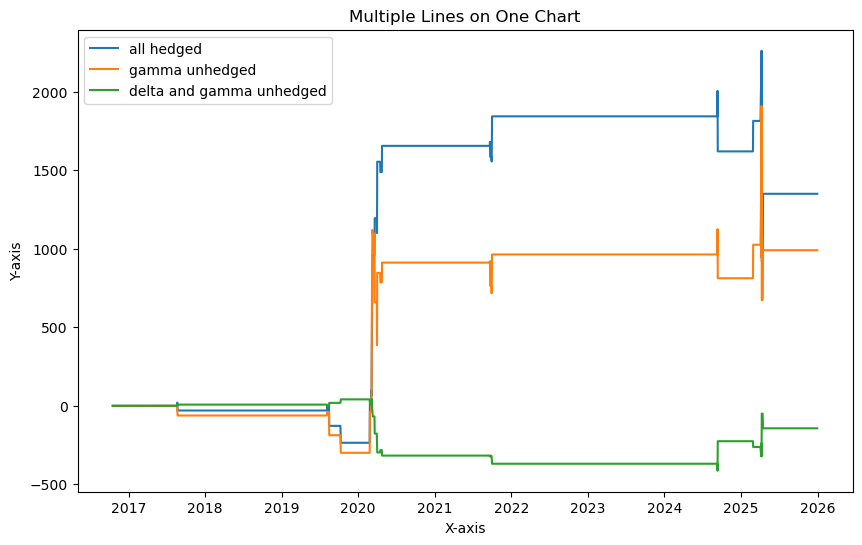

In [5]:
df = generate_polynomial("SPX")

df_strategy = single_option_upside_long(df.copy(), 2, 1, 1, 200, 15, 15)
df_pnl = calculate_pnl(df_strategy)

df_strategy_2 = single_option_upside_long_gu(df.copy(), 2, 1, 1, 200, 15, 15)
df_pnl_2 = calculate_pnl(df_strategy_2)

df_strategy_3 = single_option_upside_long_dugu(df.copy(), 2, 1, 1, 200, 15, 15)
df_pnl_3 = calculate_pnl(df_strategy_3)

# Plot multiple lines
plt.figure(figsize=(10, 6))
# plt.plot(spx_straddle["date"], spx_straddle["Cumulative PnL"], label='ATM')
plt.plot(df_pnl["date"], df_pnl["Cumulative PnL"], label = "all hedged")
plt.plot(df_pnl_2["date"], df_pnl_2["Cumulative PnL"], label = "gamma unhedged")
plt.plot(df_pnl_3["date"], df_pnl_3["Cumulative PnL"], label = "delta and gamma unhedged")


# Add labels, title, and legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Multiple Lines on One Chart")
plt.legend()

# Show the plot
plt.show()